In [1]:
import pandas as pd
import numpy as np #for mathematical purpose.
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')

In [3]:
train.shape

(614, 13)

In [4]:
test.shape

(367, 12)

In [5]:
train_original = train.copy()

In [6]:
test_original = test.copy()

In [7]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
train.info()
#object: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status
#numerical: ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

<AxesSubplot:>

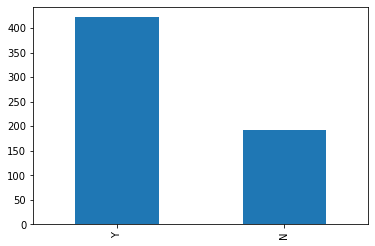

In [12]:
train['Loan_Status'].value_counts().plot.bar()

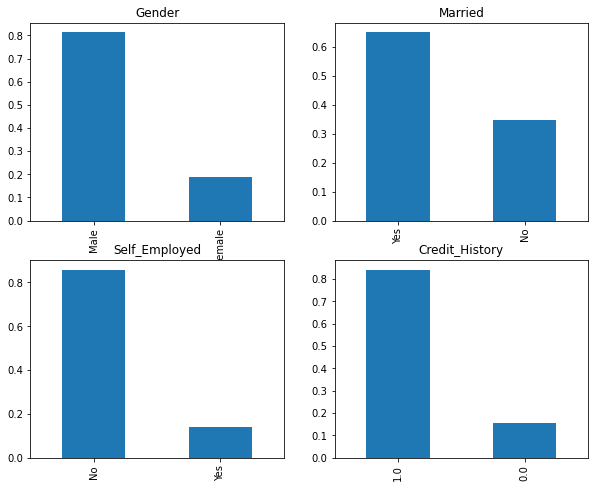

In [13]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize = (10,8), title = 'Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize = (10,8), title = 'Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize = (10,8), title = 'Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize = (10,8), title = 'Credit_History')
plt.show()

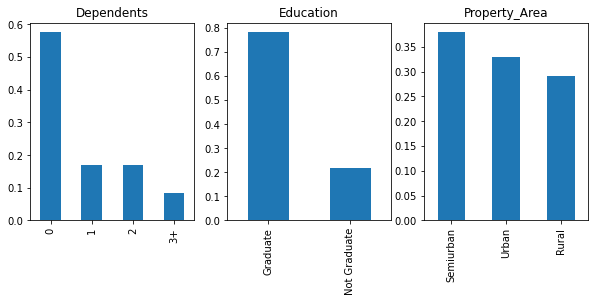

In [14]:
plt.figure(1)
plt.subplot(231)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize = (10,8), title = 'Dependents')
plt.subplot(232)
train['Education'].value_counts(normalize=True).plot.bar(figsize = (10,8), title = 'Education')
plt.subplot(233)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize = (10,8), title = 'Property_Area')
plt.show()

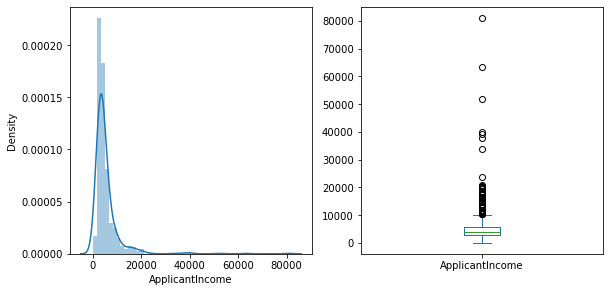

In [15]:
plt.figure(1)
plt.subplot(241)
sns.distplot(train['ApplicantIncome'])
plt.subplot(242)
train['ApplicantIncome'].plot.box(figsize = (20,10))
plt.show()

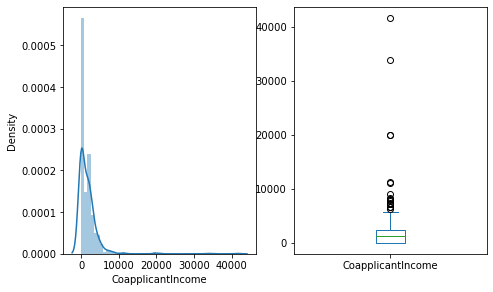

In [16]:
plt.figure(1)
plt.subplot(251)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(252)
train['CoapplicantIncome'].plot.box(figsize = (20,10))
plt.show()

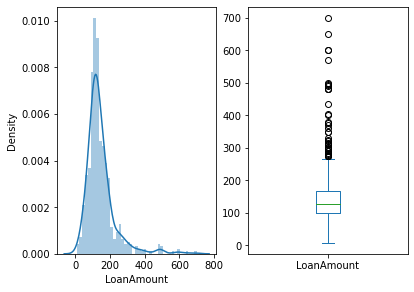

In [17]:
plt.figure(1)
plt.subplot(261)
sns.distplot(train['LoanAmount'])
plt.subplot(262)
train['LoanAmount'].plot.box(figsize = (20,10))
plt.show()

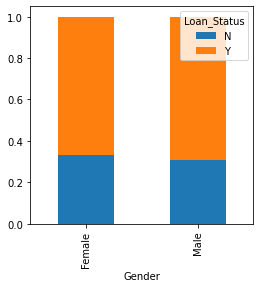

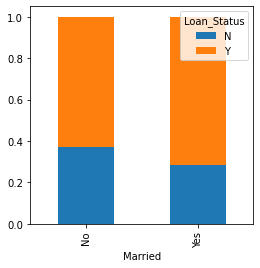

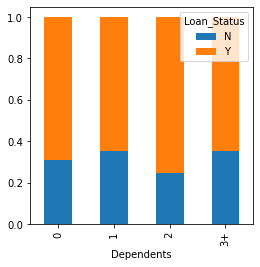

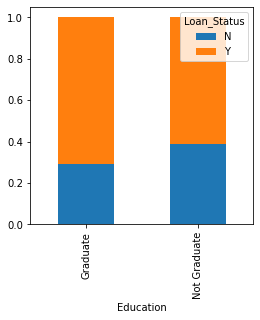

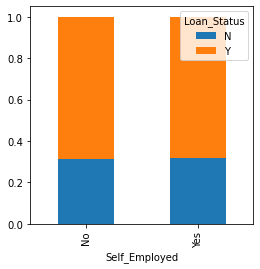

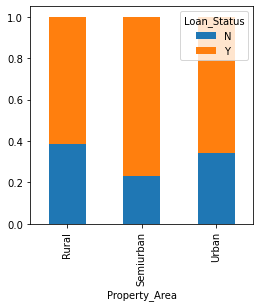

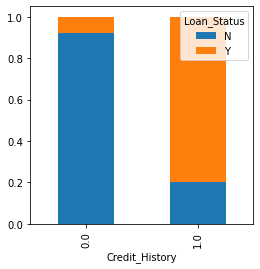

In [18]:
#categorical data: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))
plt.show()

Married = pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))
plt.show()

Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))
plt.show()

Education = pd.crosstab(train['Education'], train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))
plt.show()

Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))
plt.show()

Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))
plt.show()

Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))
plt.show()

<AxesSubplot:xlabel='Loan_Status'>

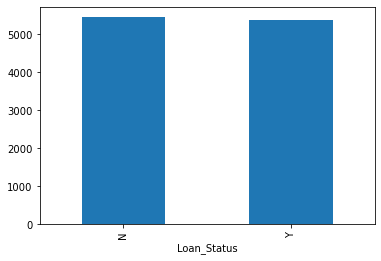

In [19]:
#numerical: ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

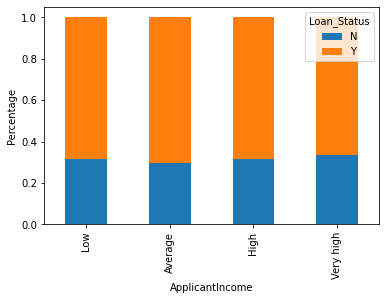

In [20]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High','Very high']
train['Income_bin'] = pd.cut(train['ApplicantIncome'],bins,labels = group)
Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis = 0).plot(kind ='bar',stacked = True) 
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')
plt.show()

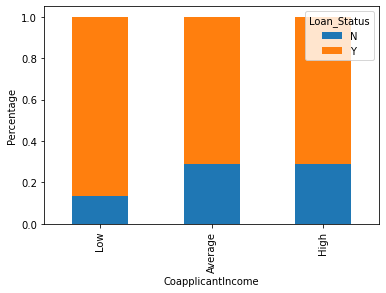

In [21]:
bins=[0,1000,2000,41000] 
group=['Low','Average','High']
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'],bins,labels = group)
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'], train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis = 0).plot(kind ='bar',stacked = True) 
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')
plt.show()

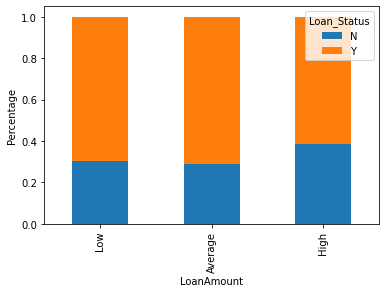

In [22]:
bins = [0,100,200,700]
group = ['Low','Average','High']
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'],bins, labels = group)
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis = 0).plot(kind ='bar',stacked = True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')
plt.show()

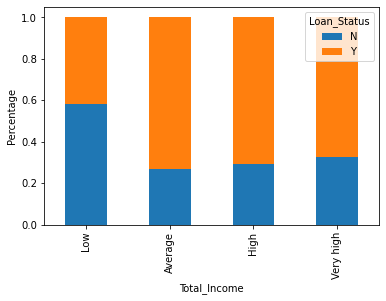

In [23]:
train['Total_Income'] = train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High','Very high']
train['Total_Income_bin'] = pd.cut(train['Total_Income'],bins,labels = group)
TotalIncome_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
TotalIncome_bin.div(TotalIncome_bin.sum(1).astype(float),axis = 0).plot(kind ='bar',stacked = True) 
plt.xlabel('Total_Income')
plt.ylabel('Percentage')
plt.show()

In [24]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,LoanAmount_bin,Total_Income,Total_Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN,NaN,5849.0,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,Average,6091.0,Very high
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,Low,3000.0,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,High,Average,4941.0,High
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,Average,6000.0,High


In [25]:
train = train.drop(['Income_bin','Coapplicant_Income_bin','LoanAmount_bin','Total_Income','Total_Income_bin'], axis=1)

In [26]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [27]:
train['Dependents'].replace('3+',3,inplace = True)
test['Dependents'].replace('3+',3,inplace = True)
train['Loan_Status'].replace('N',0,inplace = True)
train['Loan_Status'].replace('Y',1,inplace = True)

In [28]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


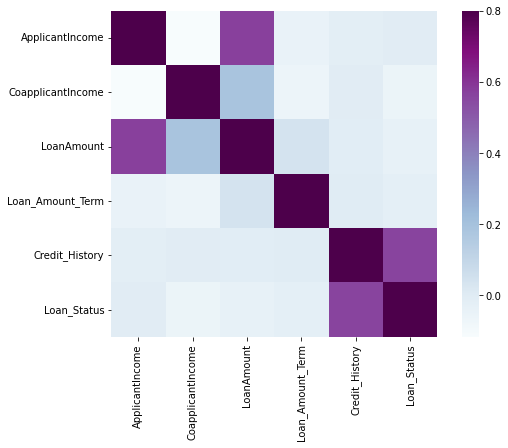

In [29]:
matrix = train.corr()
f,ax = plt.subplots(figsize =(9,6))
sns.heatmap(matrix,vmax = .8,square= True, cmap='BuPu')
plt.show()

In [30]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
# Categorical missing: Gender, Married, Dependents, Self_Employed, Property_Area, Loan_Status
# Numerical missing: LoanAmount, Loan_Amount_Term, Credit_History
train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
train['Married'].fillna(train['Married'].mode()[0], inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)

In [32]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace = True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)

In [33]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

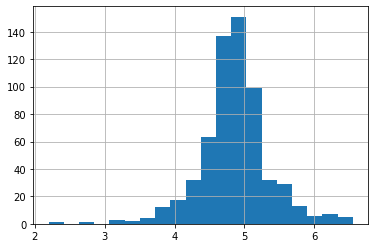

In [34]:
# To remove the skewness due to outliers, we use log transformation to get a normal distribution.
train['LoanAmount_log']= np.log(train['LoanAmount'])
test['LoanAmount_log']= np.log(test['LoanAmount'])
train['LoanAmount_log'].hist(bins = 20)

In [35]:
train['Total_Income']= train['ApplicantIncome']+ train['CoapplicantIncome']
test['Total_Income']= test['ApplicantIncome']+ test['CoapplicantIncome']

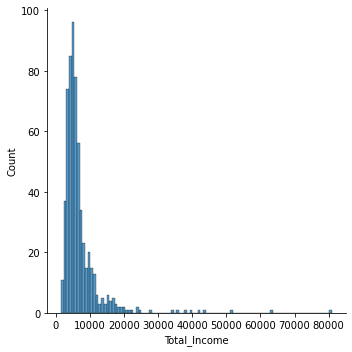

In [36]:
sns.displot(train['Total_Income'])

<AxesSubplot:xlabel='Total_Income_log', ylabel='Density'>

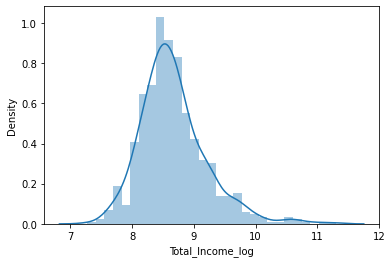

In [37]:
train['Total_Income_log']=np.log(train['Total_Income'])
test['Total_Income_log']=np.log(test['Total_Income'])
sns.distplot(train['Total_Income_log'])

In [38]:
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount']/test['Loan_Amount_Term']

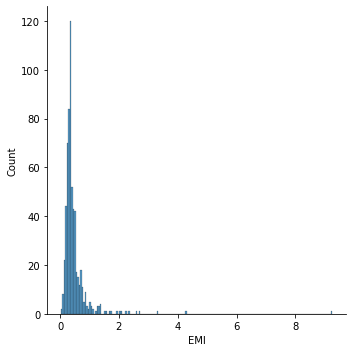

In [39]:
sns.displot(train['EMI'])

In [40]:
train['Balance_Income']=train['Total_Income'] - (train['EMI']*1000)
test['Balance_Income']=test['Total_Income'] - (test['EMI']*1000)

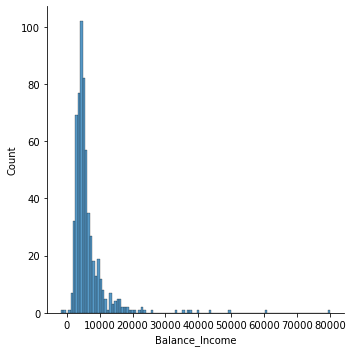

In [41]:
sns.displot(train['Balance_Income'])

In [42]:
train = train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','LoanAmount_log'], axis =1)
test = test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','LoanAmount_log'], axis =1)

In [43]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_log,EMI,Balance_Income
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,1,5849.0,8.674026,0.355556,5493.444444
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,0,6091.0,8.714568,0.355556,5735.444444
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,1,3000.0,8.006368,0.183333,2816.666667
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,1,4941.0,8.505323,0.333333,4607.666667
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,1,6000.0,8.699515,0.391667,5608.333333


In [44]:
train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

In [45]:
x = train.drop('Loan_Status',1)
y = train.Loan_Status

In [46]:
x = pd.get_dummies(x)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [47]:
x.head()

,Credit_History,Total_Income,Total_Income_log,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,5849.0,8.674026,0.355556,5493.444444,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
1,1.0,6091.0,8.714568,0.355556,5735.444444,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
2,1.0,3000.0,8.006368,0.183333,2816.666667,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
3,1.0,4941.0,8.505323,0.333333,4607.666667,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1
4,1.0,6000.0,8.699515,0.391667,5608.333333,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1


In [48]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [49]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
# from sklearn import tree
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier 
from sklearn.metrics import accuracy_score
i = 1
kf = StratifiedKFold(n_splits= 5, random_state= 104, shuffle= True)
for train_index,test_index in kf.split(x,y):
    xtr,xvl = x.iloc[train_index],x.iloc[test_index]
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]
model =LogisticRegression(random_state= 104)
model.fit(xtr,ytr)

LogisticRegression(random_state=104)

In [50]:
pred_104 = model.predict(xvl)
accuracy_score(yvl, pred_104)

0.8032786885245902

In [51]:
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3)

In [52]:
# from sklearn.linear_model import LogisticRegression
# log = LogisticRegression()
# log.fit(x_train,y_train)

In [53]:
# pred_1 = log.predict(x_test)

In [54]:
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test, pred_1)

In [55]:
test.isnull().sum()

Credit_History             29
Total_Income                0
Total_Income_log            0
EMI                        11
Balance_Income             11
Gender_Female               0
Gender_Male                 0
Married_No                  0
Married_Yes                 0
Dependents_3                0
Dependents_0                0
Dependents_1                0
Dependents_2                0
Education_Graduate          0
Education_Not Graduate      0
Self_Employed_No            0
Self_Employed_Yes           0
Property_Area_Rural         0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

In [56]:
# test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace = True)
# test['LoanAmount_log'].fillna(test['LoanAmount_log'].median(), inplace = True)
# test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace = True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace = True)
test['EMI'].fillna(test['EMI'].median(), inplace = True)
test['Balance_Income'].fillna(test['Balance_Income'].median(), inplace = True)

In [57]:
test.isnull().sum()

Credit_History             0
Total_Income               0
Total_Income_log           0
EMI                        0
Balance_Income             0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_3               0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [58]:
# pred_test = log.predict(test)

In [59]:
pred_test = model.predict(test)

In [60]:
submission = pd.read_csv('sample_submission_49d68Cx.csv')

In [61]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [62]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [63]:
submission['Loan_Status'].replace(0, 'N', inplace = True)
submission['Loan_Status'].replace(1, 'Y', inplace = True)

In [64]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [65]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logisticRone.csv', index = False)